# Algoritmo de transposición para conjuntos de datos en $n$ dimensiones

En este notebook se va a desarrollar un algoritmo que permite hacer transposiciones en un cojunto de datos para obtener otro conjunto donde los datos próximos estén más relacionados entre sí. También se necesita el algoritmo inverso.

El algoritmo se implementará con un solo bucle `for` y no con $n$ bucles anidados, pues el número de bucles anidados dependerá de la dimensión del conjunto de datos.

El agoritmo descrito se ha implementado para un máximo de 8 dimensiones.

## Definición del algoritmo y de su inversa

In [1]:
def t_data(data, sub_shp, inverse=False):
    
    dim = [0, 0, 0, 0, 0, 0, 0, 0]
    shp = [1, 1, 1, 1, 1, 1, 1, 1]
    sub = [1, 1, 1, 1, 1, 1, 1, 1]
    
    dest = np.empty(data.shape, dtype=data.dtype).flatten()
    
    dta_shp = list(data.shape)
    dta_shp.reverse()
    sub_shp = list(sub_shp)
    sub_shp.reverse()
    
    for d, s in enumerate(dta_shp):
        dim[d] = 1
        shp[d] = s
    for d, s in enumerate(sub_shp):
        sub[d] = s
    
    data_aux = data.flatten()
        
    for K in np.arange(shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*shp[5]*shp[6]*shp[7]):
        
        J = (dim[0]*((K)%sub[0] + K//(sub[0]*sub[1]*sub[2]*sub[3]*sub[4]*sub[5]*sub[6]*sub[7])%(shp[0]//sub[0])*sub[0])
             +
             dim[1]*(K//(sub[0])%sub[1]*shp[0] + K//(shp[0]*sub[1]*sub[2]*sub[3]*sub[4]*sub[5]*sub[6]*sub[7])%(shp[1]//sub[1])*shp[0]*sub[1])
             +
             dim[2]*(K//(sub[0]*sub[1])%sub[2]*shp[1]*shp[0] + K//(shp[0]*shp[1]*sub[2]*sub[3]*sub[4]*sub[5]*sub[6]*sub[7])%(shp[2]//sub[2])*shp[0]*shp[1]*sub[2])
             +
             dim[3]*(K//(sub[0]*sub[1]*sub[2])%sub[3]*shp[0]*shp[1]*shp[2] + K//(shp[0]*shp[1]*shp[2]*sub[3]*sub[4]*sub[5]*sub[6]*sub[7])%(shp[3]//sub[3])*shp[0]*shp[1]*shp[2]*sub[3])
             +
             dim[4]*(K//(sub[0]*sub[1]*sub[2]*sub[3])%sub[4]*shp[0]*shp[1]*shp[2]*shp[3] + K//(shp[0]*shp[1]*shp[2]*shp[3]*sub[4]*sub[5]*sub[6]*sub[7])%(shp[4]//sub[4])*shp[0]*shp[1]*shp[2]*shp[3]*sub[4])
             +         
             dim[5]*(K//(sub[0]*sub[1]*sub[2]*sub[3]*sub[4])%sub[5]*shp[0]*shp[1]*shp[2]*shp[3]*shp[4] + K//(shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*sub[5]*sub[6]*sub[7])%(shp[4]//sub[4])*shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*sub[5])
             +
             dim[6]*(K//(sub[0]*sub[1]*sub[2]*sub[3]*sub[4]*sub[5])%sub[4]*shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*shp[5] + K//(shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*shp[5]*sub[6]*sub[7])%(shp[4]//sub[4])*shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*shp[5]*sub[6])
             +
             dim[7]*(K//(sub[0]*sub[1]*sub[2]*sub[3]*sub[4]*sub[5]*sub[6])%sub[4]*shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*shp[5]*shp[6] + K//(shp[0]*shp[1]*shp[2]*shp[3]*shp[4]*shp[5]*shp[6]*sub[7])%(shp[4]//sub[4])*shp[0]*shp[1]*shp[2]*shp[3]*shp[5]*shp[6]*sub[7])
             )
        
        if inverse:
            dest[K] = data_aux[J]
        else:
            dest[J] = data_aux[K]
            
    return dest.reshape(data.shape)

## Testeando el algoritmo

### Inicialización de los parámatros

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tables as tb
from math import log, sqrt
import time as t

### Test con datos artificiales (4 dimensiones)

In [3]:
# Definición de los datos

a, b, c, d = 64, 16, 32, 4
data = np.arange(a * b * c * d, dtype=np.int32).reshape(a, b, c, d)
sub_shape = (8, 8, 4, 2)

print(data.dtype)
# Test de las dos funciones creadas

res = t_data(data, sub_shape, inverse=False)
org = t_data(res, sub_shape, inverse=True)

np.testing.assert_array_equal(data, org)

# Impresión de los datos reales y los datos modificados

print("Datos originales")
print(data[0][0])

print()

print("Datos modificados")
print(res[0][0])

int32
Datos originales
[[  0   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]
 [ 12  13  14  15]
 [ 16  17  18  19]
 [ 20  21  22  23]
 [ 24  25  26  27]
 [ 28  29  30  31]
 [ 32  33  34  35]
 [ 36  37  38  39]
 [ 40  41  42  43]
 [ 44  45  46  47]
 [ 48  49  50  51]
 [ 52  53  54  55]
 [ 56  57  58  59]
 [ 60  61  62  63]
 [ 64  65  66  67]
 [ 68  69  70  71]
 [ 72  73  74  75]
 [ 76  77  78  79]
 [ 80  81  82  83]
 [ 84  85  86  87]
 [ 88  89  90  91]
 [ 92  93  94  95]
 [ 96  97  98  99]
 [100 101 102 103]
 [104 105 106 107]
 [108 109 110 111]
 [112 113 114 115]
 [116 117 118 119]
 [120 121 122 123]
 [124 125 126 127]]

Datos modificados
[[   0    1  512  513]
 [   2    3  514  515]
 [   4    5  516  517]
 [   6    7  518  519]
 [1024 1025 1536 1537]
 [1026 1027 1538 1539]
 [1028 1029 1540 1541]
 [1030 1031 1542 1543]
 [2048 2049 2560 2561]
 [2050 2051 2562 2563]
 [2052 2053 2564 2565]
 [2054 2055 2566 2567]
 [3072 3073 3584 3585]
 [3074 3075 3586 3587]
 [3076 3077 3588 3589]
 [30

### Test con datos reales (2 dimensiones)

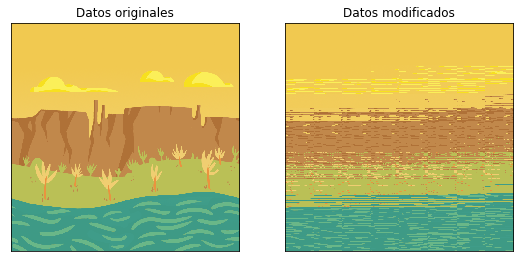

In [ ]:
# Defincición de los datos

data = (plt.imread("background.png")*255).astype(np.uint8)
data = data.view(np.uint32).reshape(data.shape[:-1])
sub_shape = (64, 128)

# Test de las dos funciones creadas

res = t_data(data, sub_shape, inverse=False)
org = t_data(res, sub_shape, inverse=True) 

np.testing.assert_array_equal(data, org)

# Impresión de los datos reales y los transformados

fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(1, 2, 1)
ax.imshow(data.reshape(data.shape + (1,)).view(np.uint8))
ax.set_title("Datos originales")
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

ax = fig.add_subplot(1, 2, 2)
ax.imshow(res.reshape(res.shape + (1,)).view(np.uint8))
ax.set_title("Datos modificados")
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

### Test con datos reales (4 dimensiones)

In [ ]:
# Función para leer el dataset

def file_reader(filename, dataset):
    with tb.open_file(filename) as f:
        child = f.root
        for element in dataset.split('/'):
            child = child.__getattr__(element)
        return child[:]

# Defincición de los datos
    
PATH = '/home/aleix/datasets/'
filename = 'WRF_India.h5'
dataset = 'U'

data = file_reader(PATH + filename, dataset)
data = np.resize(data, (2**9, 2**5, 2**4, 2**7))
sub_shape = (64, 8, 8, 64)

# Test de las dos funciones creadas

res = t_data(data, sub_shape, inverse=False)
org = t_data(res, sub_shape, inverse=True) 

np.testing.assert_array_equal(data, org)

In [ ]:
print(1)